In [55]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
 


In [56]:
df=pd.read_csv('penguins.csv')
df.head()
df=df.drop('sex', axis=1)
df=df.dropna()
print(df)
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]= scaler.fit_transform(df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']])
df


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[342 rows x 4 columns]


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-0.126893,-0.564142
1,-0.811126,0.126188,-0.107675,-0.501703
2,-0.664380,0.430462,-0.073083,-1.188532
4,-1.324737,1.089724,-0.080771,-0.938776
5,-0.847812,1.748985,-0.092301,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,-0.000056,0.903175
340,0.527932,-1.445897,0.003787,0.809516
341,1.188289,-0.735923,0.030692,1.933419
342,0.234440,-1.192335,-0.007743,1.246590


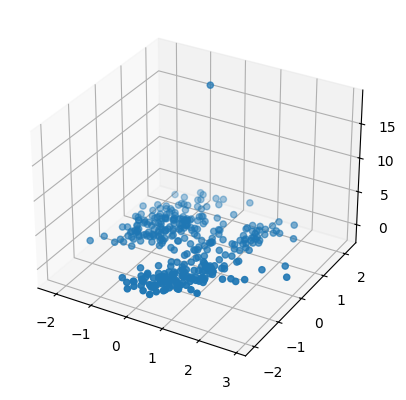

In [57]:
ax=plt.axes(projection="3d")
ax.scatter(df.culmen_length_mm,df.culmen_depth_mm,df.flipper_length_mm)
plt.show()

In [58]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']])
centers=km.cluster_centers_
centers

array([[ 0.5911792 , -1.09537263,  0.00329537],
       [ 1.08105127,  0.81119553,  0.22913703],
       [-0.94845877,  0.55390704, -0.10069624]])

In [59]:
df['cluster']=y_predict
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,-0.884499,0.785449,-0.126893,-0.564142,2
1,-0.811126,0.126188,-0.107675,-0.501703,2
2,-0.664380,0.430462,-0.073083,-1.188532,2
4,-1.324737,1.089724,-0.080771,-0.938776,2
5,-0.847812,1.748985,-0.092301,-0.689020,2
...,...,...,...,...,...
338,0.601305,-1.750171,-0.000056,0.903175,0
340,0.527932,-1.445897,0.003787,0.809516,0
341,1.188289,-0.735923,0.030692,1.933419,0
342,0.234440,-1.192335,-0.007743,1.246590,0


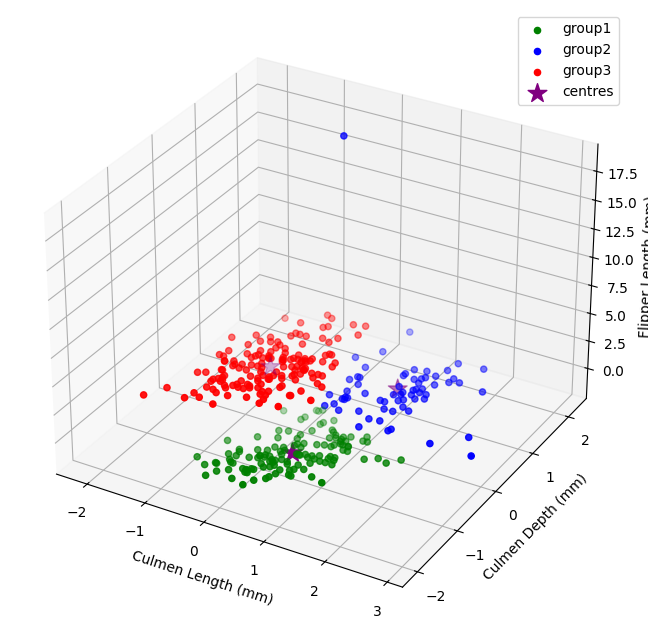

In [60]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1['culmen_length_mm'],df1['culmen_depth_mm'],df1['flipper_length_mm'],color='green',label='group1')
ax.scatter(df2['culmen_length_mm'],df2['culmen_depth_mm'],df2['flipper_length_mm'],color='blue',label='group2')
ax.scatter(df3['culmen_length_mm'],df3['culmen_depth_mm'],df3['flipper_length_mm'],color='red',label='group3')
ax.scatter(centers[:,0],centers[:,1],centers[:,2],color='purple',label='centres',marker='*',s=200)
ax.set_xlabel('Culmen Length (mm)')
ax.set_ylabel('Culmen Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')
plt.legend()
plt.show()